In [6]:
import yfinance as yf

In [8]:
import pandas as pd

In [34]:
data = yf.download('BTC-USD', start='2024-05-01', end='2025-05-01')

[*********************100%***********************]  1 of 1 completed


In [36]:
data.head()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-05-01,58254.011719,60780.500000,56555.292969,60609.496094,48439780271
2024-05-02,59123.433594,59602.296875,56937.203125,58253.703125,32711813559
2024-05-03,62889.835938,63320.503906,58848.312500,59122.300781,33172023048
2024-05-04,63891.472656,64494.957031,62599.351562,62891.031250,20620477992
2024-05-05,64031.132812,64610.890625,62955.304688,63892.453125,18296164805


In [82]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use the 'Close' column for prediction
data = data[['Close']]

# Normalize the 'Close' values to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Check if we have sufficient data for training (at least 60 data points)
time_step = 5  # Use 60 previous days' data to predict the next day's price

# Ensure we have enough data
if len(scaled_data) <= time_step:
    raise ValueError("Not enough data for the specified time step.")

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Prepare the training and test sets
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Check the shape of the data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (287, 5)
Test data shape: (68, 5)


In [84]:
print(f"Total data points after scaling: {len(scaled_data)}")

Total data points after scaling: 365


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # 10 days input, 1 feature (price)
model.add(Dropout(0.2))  # Dropout to prevent overfitting

model.add(LSTM(units=50, return_sequences=False))  # Second LSTM layer
model.add(Dropout(0.2))

# Add output layer (1 neuron for predicting the next day's price)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for LSTM model input
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32)


Epoch 1/100


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2645
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1041
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0307
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0238
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0095
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0066
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0068
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0076
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057
Epoch 16/100
9/9 ━━━━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step


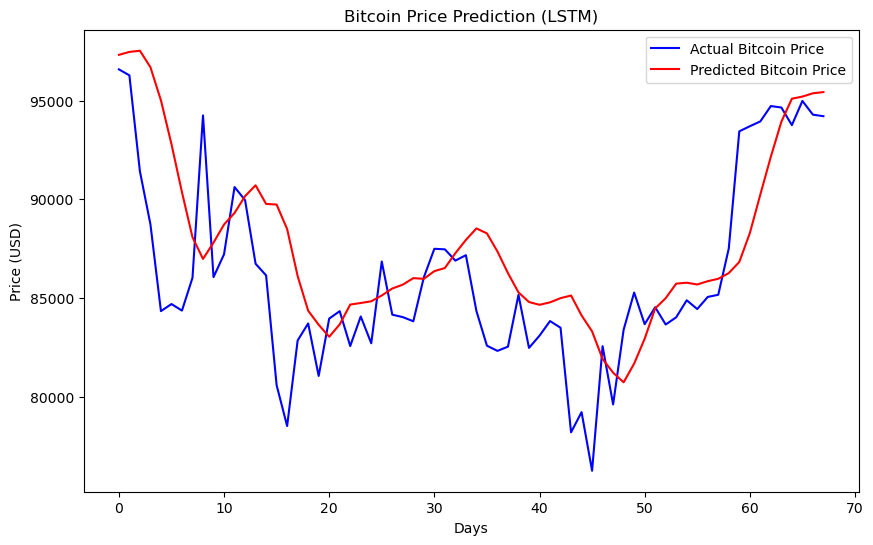

In [88]:
import matplotlib.pyplot as plt

# Predict on test set
predicted_price = model.predict(X_test_reshaped)

# Inverse scaling to get the predicted prices back in original scale
predicted_price = scaler.inverse_transform(predicted_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Bitcoin Price')
plt.plot(predicted_price, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction (LSTM)')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_actual, predicted_price)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 16649835.51367657


In [98]:
import numpy as np

# Function to forecast the next n days
def forecast(model, input_data, n_steps, time_step):
    forecasted_values = []
    # Use the last time_step days to start forecasting
    current_input = input_data[-time_step:]  # Get the most recent time_step days

    for _ in range(n_steps):
        # Reshape input to match the LSTM model's expected shape [samples, time steps, features]
        current_input = current_input.reshape((1, time_step, 1))  # (1 sample, time_step, 1 feature)

        # Predict the next value
        predicted_value = model.predict(current_input)

        # Append the predicted value to the forecasted values list
        forecasted_values.append(predicted_value[0][0])  # Flatten the result (only one value predicted)

        # Update the input for the next prediction by appending the predicted value
        # Reshape predicted_value to be compatible with current_input shape before appending
        predicted_value = predicted_value.reshape(1, 1, 1)  # Make it (1, 1, 1) to append it
        current_input = np.append(current_input[:, 1:, :], predicted_value, axis=1)  # Shift input window

    return forecasted_values


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━

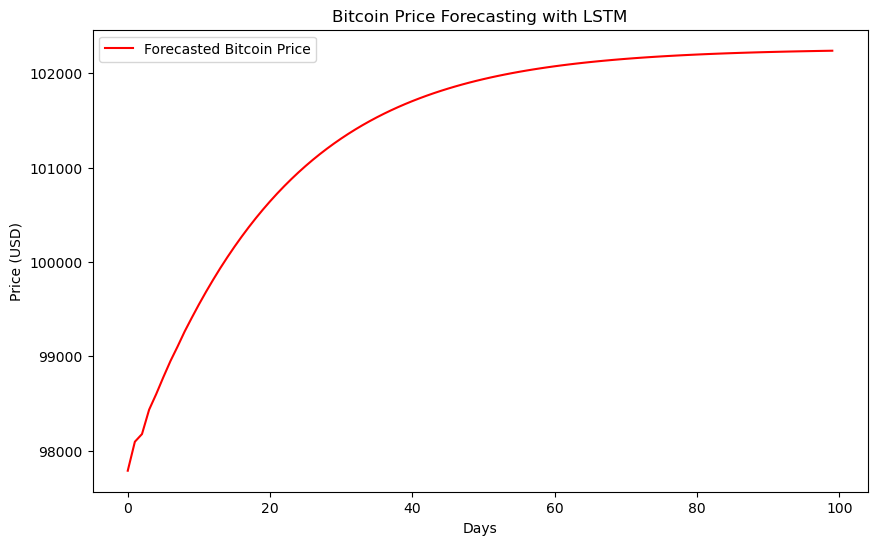

In [106]:
# Number of days you want to forecast
n_steps = 100

# Assuming you have X_train (scaled and reshaped), use the most recent 10 days as the starting point
# Use the last time_step data point from the training set
input_data = X_train[-1]  # last row from training set (most recent)

# Forecast the next n days
forecasted_prices = forecast(model, input_data, n_steps, time_step)

# Inverse transform the forecasted values to get the prices in the original scale
forecasted_prices_original_scale = scaler.inverse_transform(np.array(forecasted_prices).reshape(-1, 1))

# Visualize the forecasted prices
import matplotlib.pyplot as plt

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(forecasted_prices_original_scale, color='red', label='Forecasted Bitcoin Price')
plt.title('Bitcoin Price Forecasting with LSTM')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
